In [5]:
!pip install ultralytics --quiet
from ultralytics import YOLO
import os

# Show YOLO version
!yolo version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.226


In [ ]:
from google.colab import files

yaml_content = """
train: /content/drive/MyDrive/Colab Notebooks/dataset/images/train
val: /content/drive/MyDrive/Colab Notebooks/dataset/images/val

nc: 1
names: ['numberplate']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

!cat data.yaml


train: /content/drive/MyDrive/Colab Notebooks/dataset/images/train
val: /content/drive/MyDrive/Colab Notebooks/dataset/images/val

nc: 1
names: ['numberplate']


In [ ]:
# Use the YOLOv11n (nano) model for fast and light training
!yolo detect train data=data.yaml model=yolo11n.pt epochs=50 imgsz=640 batch=16

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/test.png: 544x640 1 numberplate, 219.9ms
Speed: 16.1ms preprocess, 219.9ms inference, 36.1ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


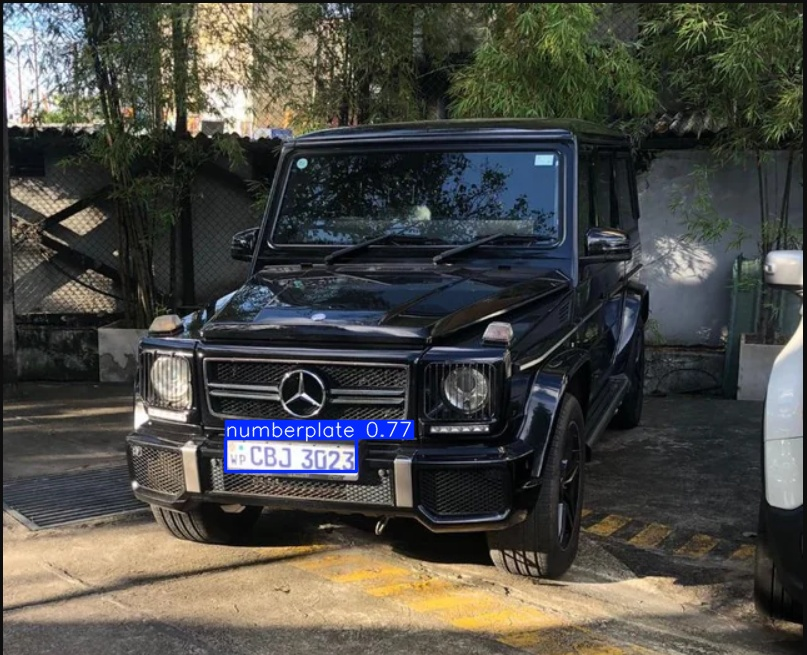

In [6]:
from google.colab import files

!yolo detect predict model=/content/best.pt source="/content/drive/MyDrive/Colab Notebooks/test.png" save=True

# View the prediction result
import glob
from IPython.display import Image, display

pred_img = glob.glob('runs/detect/predict/*.jpg')[0]
display(Image(filename=pred_img))

In [7]:
!pip install ultralytics easyocr paddleocr --quiet
!apt install -y libgl1 libglib2.0-0 > /dev/null
!pip install paddlepaddle paddleocr --quiet

import easyocr, cv2, time, numpy as np, os
from paddleocr import PaddleOCR
from IPython.display import Image, display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/Colab Notebooks/test.png: 544x640 1 numberplate, 199.4ms
Speed: 3.9ms preprocess, 199.4ms inference, 2.5ms postprocess per image at shape (1, 3, 544, 640)
Saved plates/plate_0.jpg


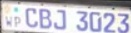

In [215]:
from google.colab import drive
drive.mount('/content/drive')

MODEL_PATH = "/content/best.pt"
TEST_IMAGE = "/content/drive/MyDrive/Colab Notebooks/test.png"

model = YOLO(MODEL_PATH)

results = model(TEST_IMAGE)
os.makedirs("plates", exist_ok=True)

plate_paths = []
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    img = r.orig_img
    for i, (x1, y1, x2, y2) in enumerate(boxes):
        crop = img[int(y1):int(y2), int(x1):int(x2)]
        pth = f"plates/plate_{i}.jpg"
        cv2.imwrite(pth, crop)
        plate_paths.append(pth)
        print(f"Saved {pth}")

if not plate_paths:
    print("⚠️ No plates detected!")
else:
    display(Image(filename=plate_paths[0]))

In [9]:
easy_reader = easyocr.Reader(['en'], gpu=False)
paddle_reader = PaddleOCR(use_angle_cls=True, lang='en')
print("✅ OCR engines ready")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/tmp/ipython-input-273640880.py:2: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  paddle_reader = PaddleOCR(use_angle_cls=True, lang='en')
/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your sett

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/UVDoc`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

✅ OCR engines ready



🔹 Image: plates/plate_0.jpg
Original


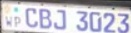

Grayscale


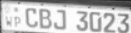

Bilateral Denoising


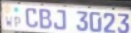

CLAHE


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


In [222]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

# --- Visualization Helper ---
def debug_imshow(title, image, wait=True):
    """Shows image and waits for key press. Useful for debugging steps."""
    cv2_imshow(image)
    # Removed cv2.waitKey and cv2.destroyWindow as they are not applicable with cv2_imshow
    # For debugging in Colab, cv2_imshow displays the image directly in the output.
    # You can manually inspect the image in the output of the cell.

# --- Advanced Preprocessing Pipeline ---
def preprocess_advanced(img, debug=True):
    print("Original")
    if debug: debug_imshow("0. Original", img)

    # 1. Grayscale
    print("Grayscale")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if debug: debug_imshow("1. Grayscale", gray)

    # 2. Bilateral Filter (Reduces noise while preserving edges - better than standard blur)
    # d=9, sigmaColor=75, sigmaSpace=75 are good starting points
    print("Bilateral Denoising")
    denoised = cv2.bilateralFilter(gray, 1, 90, 75)
    if debug: debug_imshow("2. Bilateral Denoising", denoised)

    # 3. CLAHE (Contrast Limited Adaptive Histogram Equalization)
    # Improves contrast locally, helps with shadows/glare
    print("CLAHE")
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(11, 8))
    contrast_enhanced = clahe.apply(denoised)
    if debug: debug_imshow("3. CLAHE Contrast", contrast_enhanced)

    # 4. Sharpening
    # Makes character edges crisper for the OCR engine
    print("Sharpening")
    kernel_sharpening = np.array([[0.83, -0.9, -0.98],
                                  [-1,  9, -0.91],
                                  [-0.9, -0.9, -0.912]])
    sharpened = cv2.filter2D(denoised, -1, kernel_sharpening)
    if debug: debug_imshow("4. Sharpened", sharpened)

    # 5. Adaptive Thresholding (Optional but often very effective)
    # Converts to pure black and white based on local neighborhood, not global value.
    # You might need to tweak blockSize (11) and C (2) based on your specific images.
    print("Adaptive Thresholding")
    thresh = cv2.adaptiveThreshold(sharpened, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 9, 2)
    # Sometimes inverting helps if text is light on dark background
    # thresh = cv2.bitwise_not(thresh)
    if debug: debug_imshow("5. Adaptive Threshold", thresh)

    return sharpened

for path in plate_paths:
    print(f"\n🔹 Image: {path}")
    img = cv2.imread(path)
    if img is None:
        print("Failed to load image")
        continue

    processed_img = preprocess_advanced(img, debug=True)

    easy_text = easy_reader.readtext(img, detail=0)


    print(f"🟢 EasyOCR:  {' '.join(easy_text)} ")




🔹 Image: plate_0.jpg
🟣 Tesseract OCR:   (0.45s)


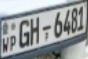

In [ ]:
!apt install -y tesseract-ocr > /dev/null
!pip install pytesseract > /dev/null

import pytesseract, cv2, time, os
from IPython.display import Image, display

# Folder where your cropped plates are saved
plate_folder = "plates"

for file in os.listdir(plate_folder):
    path = os.path.join(plate_folder, file)
    img = cv2.imread(path)

    start = time.time()
    text = pytesseract.image_to_string(img)
    elapsed = time.time() - start

    print(f"\n🔹 Image: {file}")
    print(f"🟣 Tesseract OCR: {text.strip()}  ({elapsed:.2f}s)")

    display(Image(filename=path))

In [ ]:
!pip install ncnn

!yolo export model="/content/best.pt" format=ncnn

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.0rc1 opset 22...
WARNING ⚠️ ONNX: simplifier failure: module 'onnx.helper' has no attribute 'float32_to_bfloat16'
ONNX: export success ✅ 6.7s, saved as '/content/best.onnx' (10.1 MB)

NCNN: starting export with NCNN 1.0.20250916...
WARNING ⚠️ NCNN: PNNX not found. Attempti